BER:		0.009130982367758186
REDUNDANCY:	640
BER:		0.009760705289672544
REDUNDANCY:	640
BER:		0.00850125944584383
REDUNDANCY:	640
BER:		0.011964735516372796
REDUNDANCY:	640
BER:		0.012279596977329974
REDUNDANCY:	640
BER:		0.012279596977329974
REDUNDANCY:	640
BER:		0.011649874055415618
REDUNDANCY:	640
BER:		0.010705289672544081
REDUNDANCY:	640
BER:		0.010390428211586901
REDUNDANCY:	640
BER:		0.009760705289672544
REDUNDANCY:	640
BER:		0.010390428211586901
REDUNDANCY:	640
BER:		0.012909319899244332
REDUNDANCY:	640
BER:		0.014168765743073047
REDUNDANCY:	640
BER:		0.008816120906801008
REDUNDANCY:	640
BER:		0.009130982367758186
REDUNDANCY:	640
BER:		0.009760705289672544
REDUNDANCY:	640
BER:		0.00850125944584383
REDUNDANCY:	640
BER:		0.01102015113350126
REDUNDANCY:	640
BER:		0.007241813602015114
REDUNDANCY:	640
BER:		0.011335012594458438
REDUNDANCY:	640
BER:		0.010390428211586901
REDUNDANCY:	640
BER:		0.009445843828715366
REDUNDANCY:	640
BER:		0.007556675062972292
REDUNDANCY:	640
BER:		0.008186

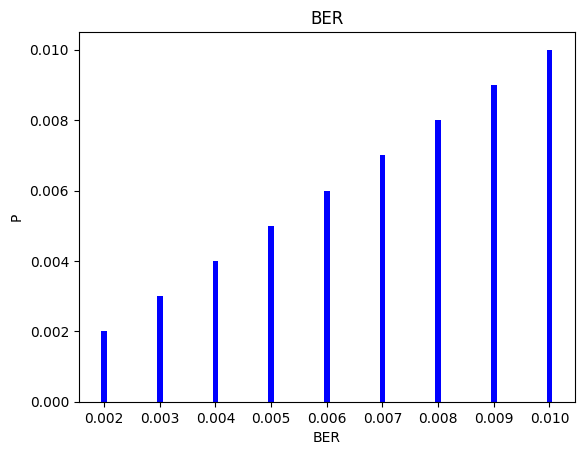

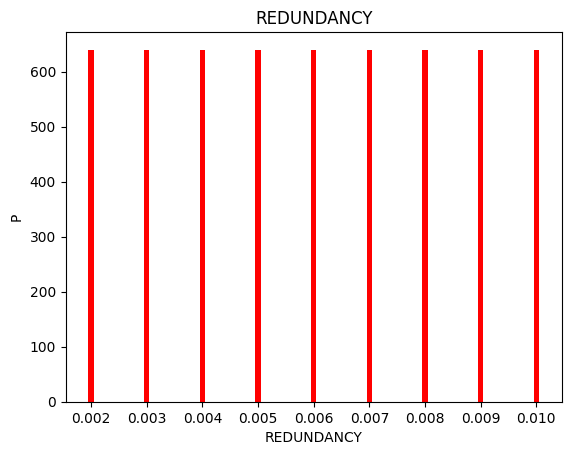

In [8]:
import komm
import matplotlib.pyplot as plt
import arqpack.binarySymmetricChannel as bscpack
import arqpack.utility as util
import arqpack.checksums as checksums
from arqpack.bitErrorRate import bitErrorRate as ber

ber_x = []
ber_y = []
redundancy_x = []
redundancy_y = []

for p in [x / 1000.0 for x in range(10, 1, -1)]:
    ber_sum = 0
    redundancy_sum = 0
    for i in range(100):
        entry = util.getSignalFromFile("input/example.txt")
        entry = entry.replace("\n", "").replace("\t", "").replace(" ", "")
        signal = util.splitBinary(entry, 64)
        signal_with_crc = []
        for block in signal:
            signal_with_crc.append(block + checksums.CRC16(block))

        signal_after_transmission = []
        for enc_block in signal_with_crc:
            new_enc_block = ""
            tmp = bscpack.binary_symmetric_channel(enc_block, p)
            for x in tmp:
                new_enc_block += str(x)
            signal_after_transmission.append(new_enc_block)
        input_data = entry
        input_signal = "".join(signal_with_crc)
        received_signal = "".join(signal_after_transmission)
        ber_sum += p
        redundancy_sum += len(received_signal) - len(input_data)
        print(f"BER:\t\t{ber(input_signal,received_signal)}")
        print(f"REDUNDANCY:\t{ len(received_signal)-len(input_data)}")
    ber_x.append(p)
    ber_y.append(ber_sum / 100)
    redundancy_x.append(p)
    redundancy_y.append(redundancy_sum / 100)
    
plt.title("BER")
plt.xlabel("BER")
plt.ylabel("P")
plt.bar(ber_x, ber_y, color="blue", width=0.0001)
plt.show()

plt.title("REDUNDANCY")
plt.xlabel("REDUNDANCY")
plt.ylabel("P")
plt.bar(redundancy_x, redundancy_y, color="red", width=0.0001)
plt.show()